In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Download dataset
2. Use the textual data of the Utterance-level information(using this alone is enough).

In [2]:
    
df = open('/content/drive/MyDrive/BigDA/wikipedia_conversations_corpus_v1.01/wikipedia_conversations_corpus_v1.01/wikipedia.talkpages.conversations.txt').read()

In [4]:
!pip install convokit
from convokit import Corpus, download
corpus = Corpus(filename=download("wiki-corpus"))

     |████████████████████████████████| 167 kB 28.9 MB/s 
     |████████████████████████████████| 6.0 MB 33.7 MB/s 
     |████████████████████████████████| 1.5 MB 59.9 MB/s 
     |████████████████████████████████| 235 kB 46.9 MB/s 
     |████████████████████████████████| 53 kB 1.4 MB/s 
     |████████████████████████████████| 175 kB 59.0 MB/s 
     |████████████████████████████████| 749 kB 52.7 MB/s 
     |████████████████████████████████| 451 kB 44.7 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 653 kB 42.7 MB/s 
     |████████████████████████████████| 181 kB 51.9 MB/s 
     |████████████████████████████████| 10.1 MB 55.5 MB/s 
  Created wheel for convokit: filename=convokit-2.5.3-py3-none-any.whl size=204129 sha256=215e5a9bfaa82a17dc4dca11d863c4e9b061066d0003a77f015a5f0244875d69
  Stored in directory: /root/.cache/pip/wheels/b0/e8/2d/81c4477fe586fe4dad2de2886b990e90e839ffccd5158ed0f3
  Created wheel for emoji: filename=emoji-1.7

In [5]:

df=corpus.get_utterances_dataframe() #converting the text corpus into the dataframe
df

,timestamp,text,speaker,reply_to,conversation_id,meta.is-admin,vectors
id,,,,,,,
524288,1.189190940E09,You should look at all of the point on the tem...,Frightner,None,524288,False,[]
524289,1.189204860E09,Yes I agree. The law permits usage of document...,Revizionist,None,524288,False,[]
1,1.310744280E09,"Yes, that's good. Revathy's page looked very r...",Johannes003,None,1,False,[]
2,1.310746500E09,"Nagma'a site, at least that filmography page, ...",Johannes003,1,1,False,[]
3,1.310751180E09,I don't think there are many such official rel...,Johannes003,2,1,False,[]
...,...,...,...,...,...,...,...
262142,1.285893360E09,Definitely not a waste of time (or at least no...,Dana boomer,262141,262137,True,[]
393215,1.160237100E09,Hi. [[Empire of Atlantium]] has been [http:\/\...,Gene Poole,None,393215,False,[]
393216,1.161765780E09,Hi Debi. Unfortunately I am not in a position ...,Kappa,393215,393215,False,[]


In [6]:
import gensim
import pandas as pd


3. Data preprocessing if needed

**Simple Preprocessing & Tokenization**

The first thing to do for any data science task is to clean the data. For NLP, we apply various processing like converting all the words to lower case, trimming spaces, removing punctuations. This is something we will do over here too.

Additionally, we can also remove stop words like 'and', 'or', 'is', 'the', 'a', 'an' and convert words to their root forms like 'running' to 'run'.

This preprocessing can be done by applying the gensim.utils.simple_preprocess

In [7]:
textual_data = df.text.apply(gensim.utils.simple_preprocess)

In [8]:
textual_data

id
524288    [you, should, look, at, all, of, the, point, o...
524289    [yes, agree, the, law, permits, usage, of, doc...
1         [yes, that, good, revathy, page, looked, very,...
2         [nagma, site, at, least, that, filmography, pa...
3         [don, think, there, are, many, such, official,...
                                ...                        
262142    [definitely, not, waste, of, time, or, at, lea...
393215    [hi, empire, of, atlantium, has, been, http, e...
393216    [hi, debi, unfortunately, am, not, in, positio...
262143    [hi, dana, it, seems, to, me, that, user, yoge...
262144    [at, this, point, the, best, way, the, far, ca...
Name: text, Length: 391294, dtype: object

**4. Use the Gensim word2Vec model to vectorize the text and save the model (remember to train the word2vec model)**

In [ ]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

In [ ]:
model.build_vocab(textual_data, progress_per=1000)

In [ ]:
model.train(textual_data, total_examples=model.corpus_count, epochs=model.epochs)

(66640010, 86231260)

In [ ]:
model.save("/content/drive/MyDrive/BigDA/word2vec_output_model.model")


**5. Use Sklearn Kmeans cluster function to cluster the created vectors (Use cluster size =10)**

**6. Group the words that are in the same embedding space.**


In [ ]:

my_list = []
for idx, key in enumerate(model.wv.vocab):
    my_list.append(model.wv[key])


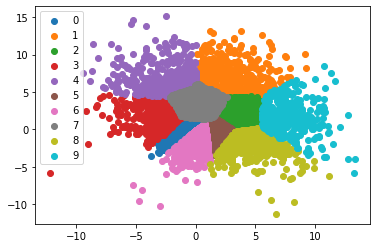

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
#data = load_digits().data
pca = PCA(2)
 
#Transform the data
df1 = pca.fit_transform(my_list)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df1)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df1[label == i , 0] , df1[label == i , 1] , label = i)
plt.legend()
plt.show()

**TASK2**

**GloVe embeddings Model**


GloVe stands for global vectors for word representation. It is an unsupervised learning algorithm developed by Stanford for generating word embeddings by aggregating global word-word co-occurrence matrix from a corpus.

In [9]:
textual_data1 = textual_data.to_list()    #Already preprocessed data using as the data in the GloVec Model


In [10]:
data = [[' '.join(i)] for i in textual_data1]
data

[['you should look at all of the point on the template not just the last one the template also says the image belonging to the republic of macedonia is in the public domain if it being used for information purposes'],
 ['yes agree the law permits usage of documents photographs and other materials for educational and informational purposes there was normative act issued by the government of the republic of macedonia that even allowed citizens to make photocopies or photograph rare archive materials'],
 ['yes that good revathy page looked very reliable that why we used that as source'],
 ['nagma site at least that filmography page looks like taken from wikipedia itself didn remove it from time being but don think it true'],
 ['don think there are many such official reliable sites left yet the problem is most official sites are not really official and often based on wikipedia itself and you don know what to believe and what not we used madras talkies page which is dead now http kavithalay

In [11]:
data1 = []
for i in range(len(data)):
    for j in range(len(data[i])):
        data1.append(data[i][j])
data1

['you should look at all of the point on the template not just the last one the template also says the image belonging to the republic of macedonia is in the public domain if it being used for information purposes',
 'yes agree the law permits usage of documents photographs and other materials for educational and informational purposes there was normative act issued by the government of the republic of macedonia that even allowed citizens to make photocopies or photograph rare archive materials',
 'yes that good revathy page looked very reliable that why we used that as source',
 'nagma site at least that filmography page looks like taken from wikipedia itself didn remove it from time being but don think it true',
 'don think there are many such official reliable sites left yet the problem is most official sites are not really official and often based on wikipedia itself and you don know what to believe and what not we used madras talkies page which is dead now http kavithalayaa com ka

In [12]:

import numpy as np
from numpy import array 
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D, Dropout
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
token = Tokenizer()
token.fit_on_texts(data1)

In [15]:
vocab_size = len(token.word_index)+1
vocab_size

190128

In [16]:
token.index_word

{1: 'the',
 2: 'to',
 3: 'you',
 4: 'and',
 5: 'of',
 6: 'it',
 7: 'that',
 8: 'is',
 9: 'in',
 10: 'for',
 11: 'on',
 12: 'be',
 13: 'not',
 14: 'have',
 15: 'this',
 16: 'as',
 17: 'but',
 18: 'if',
 19: 'your',
 20: 'was',
 21: 'article',
 22: 'with',
 23: 'are',
 24: 'wikipedia',
 25: 'at',
 26: 'my',
 27: 'page',
 28: 'or',
 29: 'can',
 30: 'an',
 31: 'there',
 32: 'so',
 33: 'do',
 34: 'talk',
 35: 'thanks',
 36: 'user',
 37: 'would',
 38: 'me',
 39: 'about',
 40: 'just',
 41: 'what',
 42: 'from',
 43: 'one',
 44: 'by',
 45: 'all',
 46: 'think',
 47: 'don',
 48: 'no',
 49: 'see',
 50: 'will',
 51: 'we',
 52: 'some',
 53: 'like',
 54: 'they',
 55: 'font',
 56: 'more',
 57: 'any',
 58: 've',
 59: 'been',
 60: 'know',
 61: 'which',
 62: 'http',
 63: 'has',
 64: 'wp',
 65: 'should',
 66: 'articles',
 67: 'up',
 68: 'he',
 69: 'other',
 70: 'please',
 71: 'time',
 72: 'now',
 73: 'good',
 74: 'also',
 75: 'when',
 76: 'out',
 77: 'them',
 78: 'here',
 79: 'll',
 80: 'edit',
 81: 'coul

In [17]:
encoded_text = token.texts_to_sequences(data1)
encoded_text[:3]

[[3,
  65,
  115,
  25,
  45,
  5,
  1,
  163,
  11,
  1,
  116,
  13,
  40,
  1,
  250,
  43,
  1,
  116,
  74,
  423,
  1,
  122,
  8043,
  2,
  1,
  2242,
  5,
  4320,
  8,
  9,
  1,
  622,
  1132,
  18,
  6,
  125,
  165,
  10,
  173,
  1999],
 [237,
  244,
  1,
  999,
  6278,
  1162,
  5,
  2146,
  3049,
  4,
  69,
  2767,
  10,
  4641,
  4,
  11118,
  1999,
  31,
  20,
  23747,
  1221,
  3551,
  44,
  1,
  1080,
  5,
  1,
  2242,
  5,
  4320,
  7,
  123,
  929,
  5270,
  2,
  108,
  30596,
  28,
  2567,
  2324,
  566,
  2767],
 [237, 7, 73, 99723, 27, 577, 102, 349, 7, 114, 51, 165, 7, 16, 177]]

In [18]:
Max_Len = 120
X = pad_sequences(encoded_text, maxlen=Max_Len, padding='post')

In [ ]:
X.shape

(391294, 120)

In [ ]:
glove_vectors = dict()

In [ ]:

file= open('/content/drive/MyDrive/BigDA/glove.6B.100d.txt',encoding='utf-8')
for line in file:
    values=line.split()
    word=values[0]
    vectors=np.asarray(values[1:])
    glove_vectors[word]=vectors
file.close()

In [ ]:
len(glove_vectors.keys())

400000

In [ ]:
glove_vectors.get('you').shape

(100,)

In [ ]:
word_vector_matrix=np.zeros((vocab_size,100))
for word, index in token.word_index.items():
    vector = glove_vectors.get(word)
    if vector is not None:
        word_vector_matrix[index]=vector

In [ ]:
word_vector_matrix

array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [-0.038194, -0.24487 ,  0.72812 , ..., -0.1459  ,  0.8278  ,
         0.27062 ],
       [-0.1897  ,  0.050024,  0.19084 , ..., -0.39804 ,  0.47647 ,
        -0.15983 ],
       ...,
       [-0.19297 ,  0.075193,  0.37197 , ..., -0.33142 , -0.15266 ,
        -0.52358 ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [-0.055708, -0.44714 , -0.40131 , ...,  0.068475, -0.48577 ,
         0.083225]])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(word_vector_matrix)

In [ ]:

kmeans = KMeans(init="random",n_clusters=10,n_init=10,max_iter=300,random_state=4)
kmeans.fit(scaled_features)
kmeans.labels_[:5]

array([4, 9, 9, 9, 9], dtype=int32)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


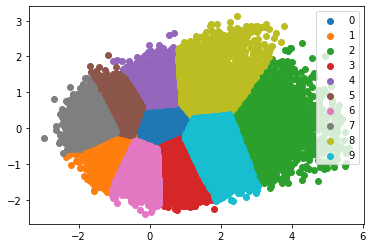

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
#data = load_digits().data
pca = PCA(2)
 
#Transform the data
df2 = pca.fit_transform(word_vector_matrix)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df2)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
plt.legend()
plt.show()

**Report**



**Gensim's model output:**

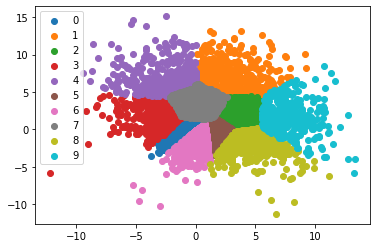

**GloVec Model's Output:**

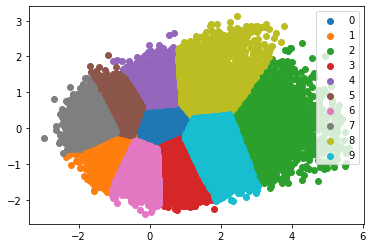

**Result:** From the ouputs, we can say that changing the word embedding affects cluster performance